In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [3]:
## Stock of Apple Inc from January 2017 to December 2020
data = pd.read_csv("AAPL.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.459938,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.429203,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.568691,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.876030,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.131361,134247600
...,...,...,...,...,...,...,...
1001,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.764603,88223700
1002,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.773087,54930100
1003,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.486053,124486200
1004,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.668762,121047300


In [4]:
## using 756 sample from the data representing a period of 756 trading days in 3 years.
close_price = np.array(data.Close[:756])

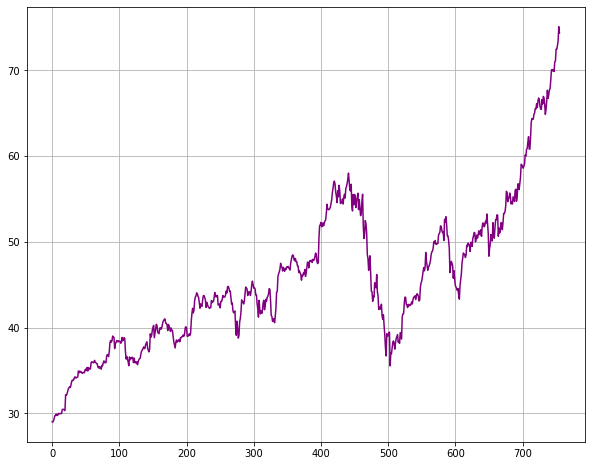

In [5]:
## Visualizing the stock trajectory 
plt.figure(figsize = (10,8))
plt.plot(close_price, c= 'purple')
plt.grid()
plt.show()

In [6]:
### Computing the daily log returns of the asset

def daily_log_RETURN(close_price):
    r_i = np.zeros(len(close_price))
    
    for i in range(len(close_price)):
        if i != (len(close_price)-1):
            r_i[i] = np.log((close_price[i+1])/(close_price[i]))
        elif i == (len(close_price)-1):
            print("Done")
    return r_i

In [7]:
## Get returns
returns = daily_log_RETURN(close_price)

Done


## Question 2

In [8]:
### Computing the sample mean of the data
def sample_mean(returns):
    return (1/len(returns))*(np.sum(returns))
print("The sample mean of the data: ", sample_mean(returns))

The sample mean of the data:  0.001243778329455727


In [9]:
### Computing the standard deviation and scalin of the data
def scaler(returns):
    mean = sample_mean(returns)
    dev = []
    for i in returns:
        dev.append((i-mean)**2)   
    var = (1/(len(returns)-1))*np.sum(dev)
    
    stdev = np.sqrt(var)
    scaled_df = (returns-mean)/stdev
    return stdev, scaled_df

In [10]:
## Get standard deviation and scaled data.
Standard_deviation, scaled_data = scaler(returns)
print("The standard deviation of the data is : ", Standard_deviation)

The standard deviation of the data is :  0.015592252340809949


## Question 3

### Empirical Probability Distribution

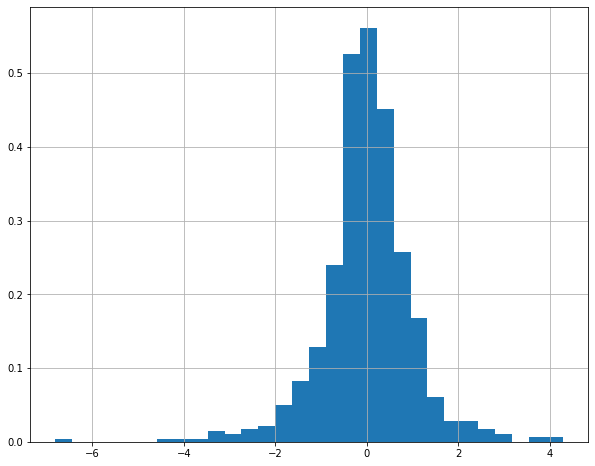

In [11]:
plt.figure(figsize = (10,8))
plt.hist(scaled_data, bins = 30, density=True)

plt.grid()
plt.show()

### Normal Distribution Curve

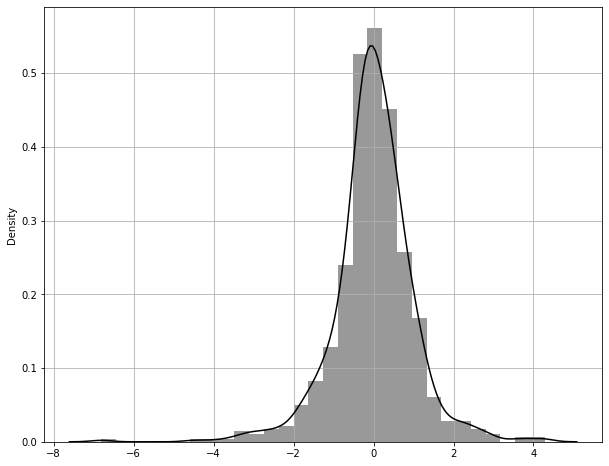

In [12]:
### Distribution plot with the Kernel densitor estimate.
plt.figure(figsize = (10,8))
sns.distplot(scaled_data, norm_hist= True,bins=30, color = 'black')

plt.grid()
plt.show()

- Histograms and kernel density estimators are only the first step in trying to get an overall idea about how the data looks and to investigate if it behaves like any other known distribution. 

- It's evidenced that the histogram has heavy tails

## Question 4

- The Q-Q plot is a probability plot which is a graphic in which the empirical order statistics on the Y-axis are compared to expected values of some theoretical order statistics located on the X-axis.

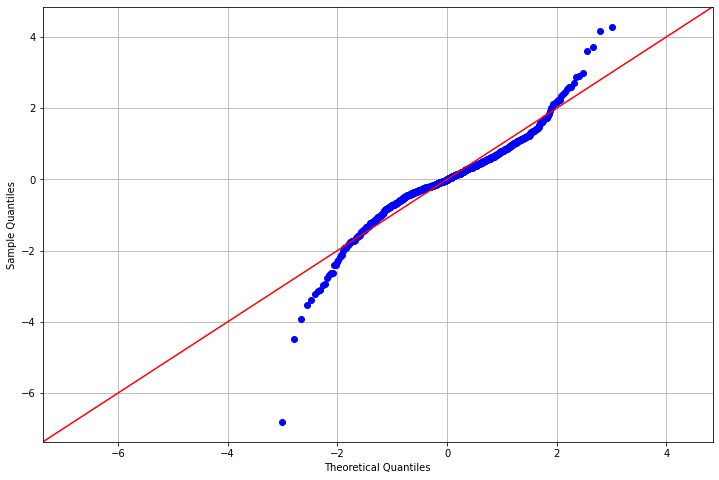

In [13]:
#### Q-Q plot for the returns.
plt.rc("figure", figsize=(12,8))
sm.qqplot(scaled_data, line = '45')
plt.grid()
plt.show()

## Report

 - As we are testing for normality the Q-Q plots will plot the standardized empirical quantiles of the observed data against the quantile of a standardnormal random variable.
 
 - A  quantile is  a figure that a certain  percentage, or fraction, of the data lies below in the distribution.
 
 - The 0.25,  0.50,  and 0.75-quantiles are commonly known as  the  first,  second  and  third  quartiles respectively.   The  0.01,  0.02,  0.03,...-quantiles are called the first, second, third, ...  percentiles respectively. 
 - The Q-Q plot is then the plot of these percentiles of the empirical distribution against the theoretical distribution that we wish to compare it to.
 
 - Assuming that the data is normally distributed we will expect to observe a linear plot except for some random fluctuations in the data
 
 - Any systematic deviation from the red line indicates that the data is non-normal.
 
 - For a heavy-tailed distribution one would expect to see the upper tails of  the  Q-Q  plot  turning  upwards  and  the  lower  tails  bending  downwards.
 
 - Hence, our log returns have heavy tails which tend to exhibit random fluctuations in in the linearity of the quantile plot as well as lower tails bending downwards and upper tails bending upwards. 